In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sn
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

dev

device(type='cpu')

In [5]:
transform_test = transforms.Compose(
    [transforms.ToTensor(),
     # transforms Normalize ( (R_mean, G_mean, B_mean), (R_std, G_std, B_std) )
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
print(testset)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [24]:
path = '../models/new_network'

model_paths = [ path + '/' + f for f in os.listdir(path) ]
print(model_paths[0])

list_path = []
for model_path in model_paths:
    list_path += [path + '/' + f for f in os.listdir(model_path) if 'pth' in f]

list_path

../models/new_network/pruning_10


['../models/new_network/gamma1.0acc0.75dst0.01.pth',
 '../models/new_network/gamma0.5acc0.79dst0.03.pth',
 '../models/new_network/gamma0.5acc0.79dst0.07.pth',
 '../models/new_network/gamma0.5acc0.80dst0.02.pth',
 '../models/new_network/gamma0.5acc0.79dst0.02.pth',
 '../models/new_network/gamma0.0acc0.82dst1.0.pth',
 '../models/new_network/gamma1.5acc0.65dst0.06.pth']

In [ ]:
models = [ tf.keras.models.load_model(model_path) for model_path in model_paths ]

In [ ]:
[ model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
) for model in models ]

predictions = [ model.predict(x_test) for model in models ]
predicted_classes = [ np.argmax(prediction, axis=1) for prediction in predictions ]

In [ ]:
confusion_matrixes = [ tf.math.confusion_matrix(y_test, pred_classes).numpy() 
                          for pred_classes in predicted_classes ]

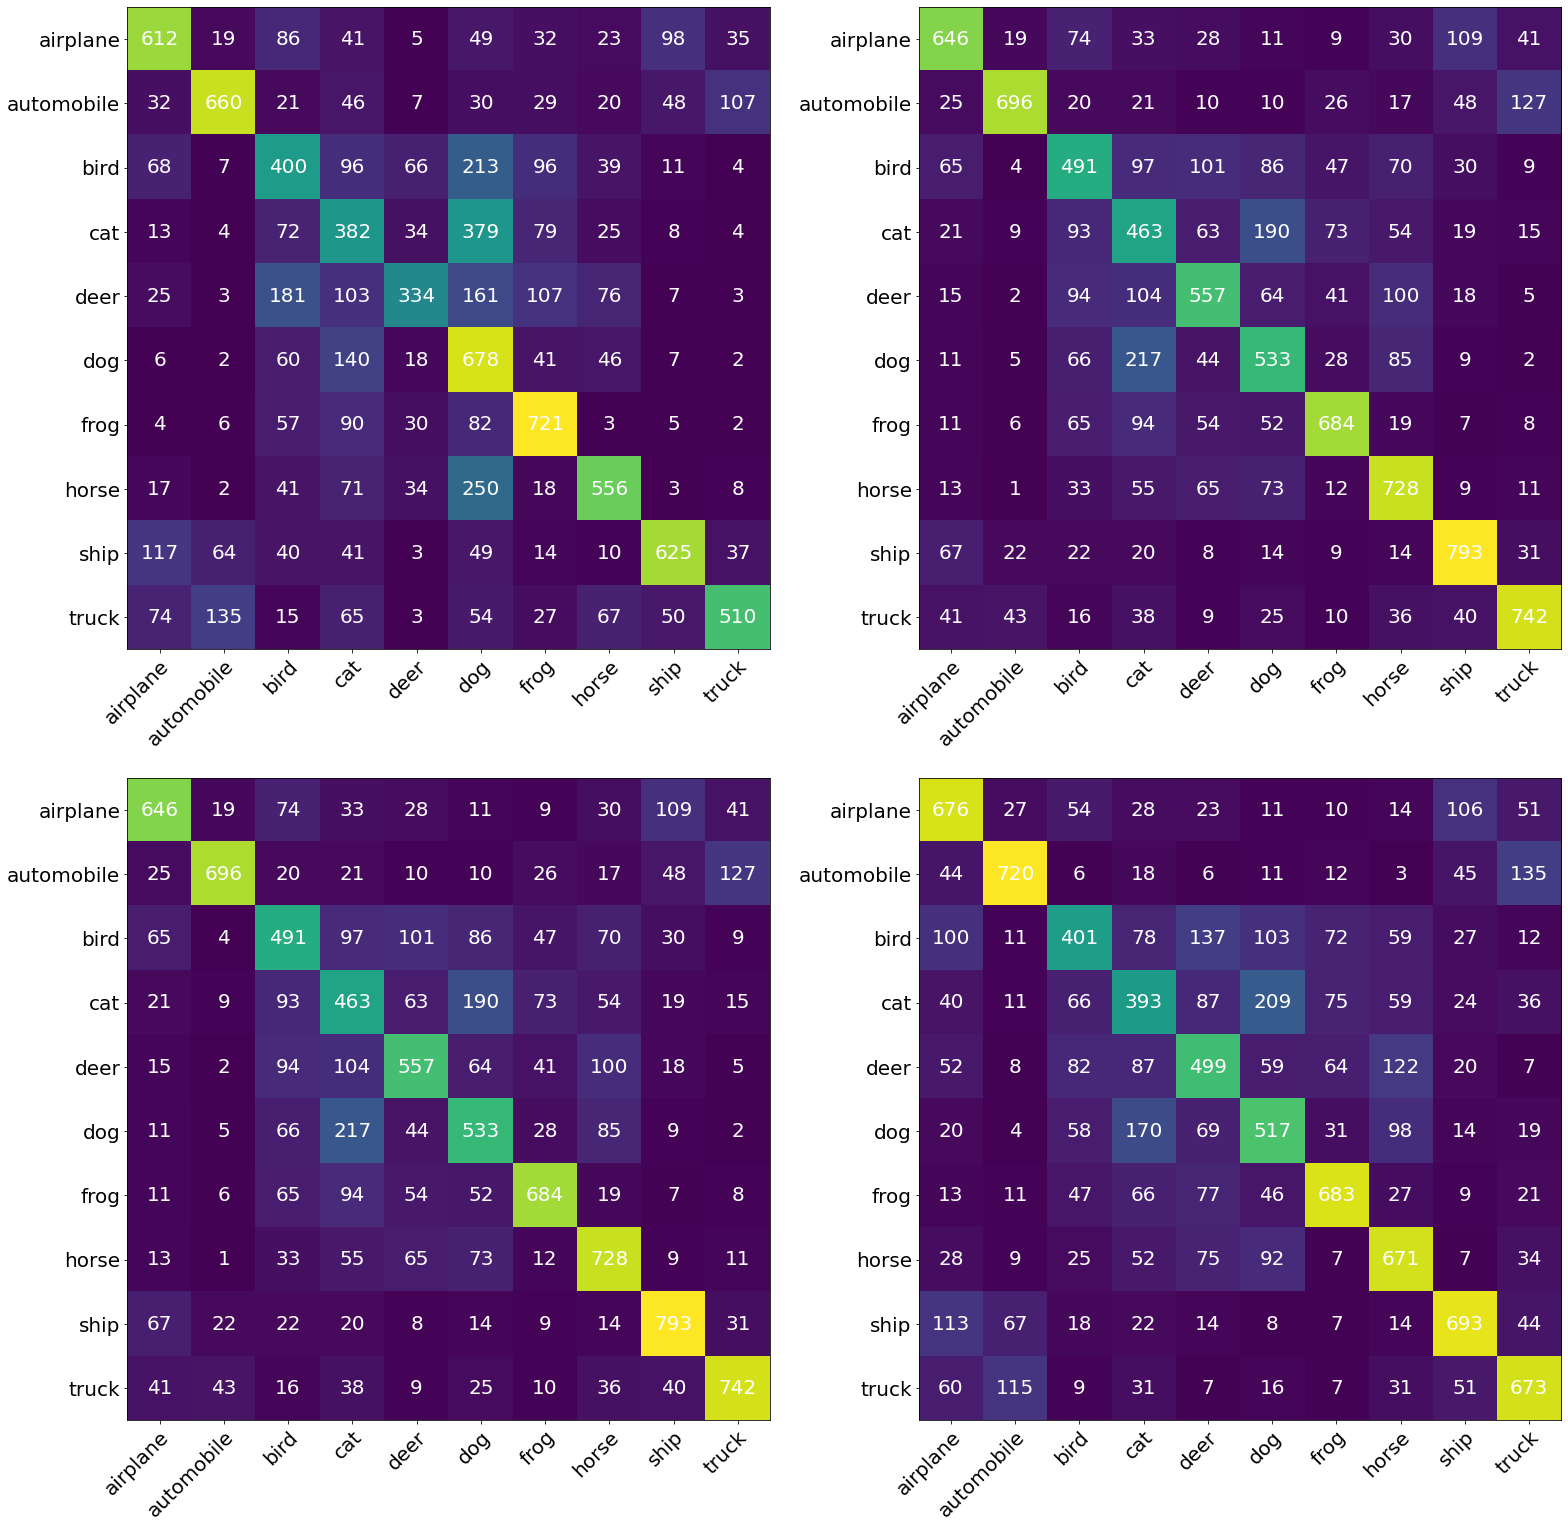

In [ ]:
classes = [ translate(c) for c in np.arange(10) ]

fig, axies = plt.subplots(2, 2, figsize=(26, 26))

for idx in range(2):
    for jdx in range(2):
        
        df_cm = pd.DataFrame(confusion_matrixes[idx%2 + jdx], index=classes, columns=classes)

        im = axies[idx][jdx].imshow(confusion_matrixes[idx%2 + jdx])

        # We want to show all ticks...
        axies[idx][jdx].set_xticks(np.arange(len(classes)))
        axies[idx][jdx].set_yticks(np.arange(len(classes)))
        # ... and label them with the respective list entries
        axies[idx][jdx].set_xticklabels(classes, fontsize=20)
        axies[idx][jdx].set_yticklabels(classes, fontsize=20)

        # Rotate the tick labels and set their alignment.
        plt.setp(axies[idx][jdx].get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(classes)):
            for j in range(len(classes)):
                text = axies[idx][jdx].text(j, i, confusion_matrixes[idx%2 + jdx][i][j],
                               ha="center", va="center", color="w", fontsize=20)

print("")